In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("toothpaste_full.csv", error_bad_lines=False, sep = "\t")


/Users/kluthria/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/kluthria/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
dummy = pd.get_dummies(df.country)
new_cols = []
for x in dummy.columns:
    new_cols.append("country_"+ x)
dummy.columns = new_cols
dummy

dummy2 = pd.get_dummies(df.company)
final = pd.concat([df,dummy,dummy2], axis =1)
cols = list(final.columns)
cols.remove("country")
cols.remove("company")
cols.remove("Unnamed: 0")
cols.remove("ingredients")

final = final[cols]
final = final.fillna(1)
train_cols = list(final.columns)
test_cols = ["price_per_100g_ml_dollars"]
train_cols.remove("price_per_100g_ml_dollars")


train_features, test_features, train_labels, test_labels =train_test_split(final[train_cols], final[test_cols], test_size = 0.3, random_state = 42)
train_features

,total_pack_size_ml_g,unit_pack_size_ml_g,zinc coco-sulfate,sodium phosphate tertiary,vitamin c,silver magnolia supercritical carbon dioxide dried extract,titanium dioxide)) whitening finisher,hamamelis virginia water,vayvidang,marich,...,Brand 990,Brand 991,Brand 992,Brand 993,Brand 994,Brand 995,Brand 996,Brand 997,Brand 998,Brand 999
13070,1.0,180.00,-1,-1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,0
10557,1.0,125.00,-1,-1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,0
14754,1.0,75.00,-1,-1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,0
12718,1.0,50.00,-1,-1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,0
4325,1.0,50.00,-1,-1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,0
3219,1.0,90.00,-1,-1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,0
7453,1.0,75.00,-1,-1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,0
6765,1.0,100.00,-1,-1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,0
1193,1.0,100.00,-1,-1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,0
45,1.0,110.00,-1,-1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,0


In [27]:
org_final = final.copy()
final["price_per_100g_ml_dollars"]= np.cbrt(np.sqrt((final["price_per_100g_ml_dollars"])))


In [83]:
from sklearn.utils import shuffle
final = shuffle(final)
train_cols = list(final.columns)

test_cols = ["price_per_100g_ml_dollars"]
train_cols.remove("price_per_100g_ml_dollars")


train_features, test_features, train_labels, test_labels =train_test_split(final[train_cols], final[test_cols], test_size = 0.15)
train_features
rf = RandomForestRegressor(n_estimators=100, max_features=2500, min_samples_split=4 )
# Train the model on training data
rf.fit(train_features, train_labels );


/Users/kluthria/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


0.7045473123259959


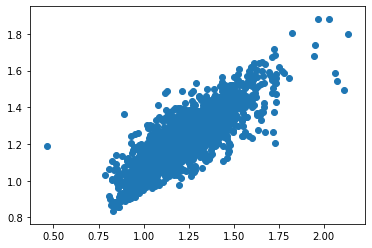

In [84]:
rf.predict(test_features)
test_labels
df2= test_labels.copy()
df2["results"] = rf.predict(test_features)
df2
plt.scatter(test_labels["price_per_100g_ml_dollars"].to_numpy(),df2["results"])
from sklearn.metrics import r2_score

coefficient_of_dermination = r2_score(test_labels["price_per_100g_ml_dollars"], df2["results"])
print(coefficient_of_dermination)
plt.show()



In [95]:
mean_squared_error(np.power(test_labels["price_per_100g_ml_dollars"], 4),  np.power(df2["results"], 4))

1.0862303459646694

In [258]:
print (sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), final.columns), 
             reverse=True))

[(0.0534, 'unit_pack_size_ml_g'), (0.0169, 'acacia arabica bark powder'), (0.0167, 'sodium monofluorophosphate aqua'), (0.0159, 'bomeo'), (0.0155, 'empetrum sibiricum extract'), (0.0151, 'silicon'), (0.0146, 'potassium citrate'), (0.0142, 'peg-90m'), (0.014, 'sodium dodecylbezenesulfonate'), (0.0128, 'solvents'), (0.0115, 'country_Hungary'), (0.0111, 'zinc sulfate sorbitol'), (0.0104, 'lysozyme and/or ovum'), (0.0101, 'niacinamide'), (0.0099, 'thakkolam'), (0.0088, 'coconut alcohol'), (0.0087, 'tulsi'), (0.0086, 'triticum vulgare starch'), (0.0086, 'squalane'), (0.0084, 'sodium lauryl sulphate'), (0.0084, 'resin fibre'), (0.0083, 'ocimum basilicum leaf'), (0.0081, 'purified'), (0.0078, 'chalk'), (0.0071, 'total_pack_size_ml_g'), (0.007, 'salvadora persica extract'), (0.007, 'natural extracts'), (0.0063, 'clinacanthus nutans'), (0.0062, 'sodium saccharides'), (0.0061, 'country_Venezuela'), (0.006, 'sodium saccharin cleansing aid'), (0.0059, 'trichlorogalactose'), (0.0058, 'sophora twig 

/Users/kluthria/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [143]:
final_reform = final.T
ING = list(final_reform.index)
ING.remove("total_pack_size_ml_g")
ING.remove("unit_pack_size_ml_g")
ING.remove("price_per_100g_ml_dollars")
for x in list(final_reform.index):
    if x.startswith("Brand"):
        ING.remove(x)

arr = final_reform.as_matrix()

for x in ING:
    print(x)
    index = list(final.columns).index(x)
    for i,y in enumerate(arr[index]):
        if y>=0:
            arr[index][i] =  1
        else:
            arr[index][i] =  0  
final_reform = pd.DataFrame(arr)
final_reform = final_reform.T
final_reform.columns = final.columns

/Users/kluthria/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.


zinc coco-sulfate
sodium phosphate tertiary
vitamin c
silver magnolia supercritical carbon dioxide dried extract
titanium dioxide)) whitening finisher
hamamelis virginia water
vayvidang
marich
lactose
scutellaria extract
lake quinoline yellow
fluoride and/or olaflur and/or stannous fluoride
vanilla planifolia fruit
indian pharmacopoeia
sucrose esters
arak phudina
abrasive
vitis vinifera seed extract
marigold extract
pinus palustris oil
potassium nitrate others
lactobacillus/scutellaria baicalensis root/camellia sinensis leaf/artemisia princeps leaf/houttuynia cordata leaf/citrus junos fruit extract ferment filtrate
pigments
methylchloroisothiazolinone
peg-75
aromatic
calculus bovis
ph 6.4
hydroxyethylcellulose
trisodium ascorbyl palmitate phosphate
melaleuca alternifolia extract
aloe barbadensis
anthemis mobilis flower extract
methoxyphenyl menthane carboxamide
aesculus hippocastanum bark extract
poly
eugenia caryophyllus flower powder
ca2+
nicotiana benthamiana hexapeptide-40 sh-polyp

chirongi chilka
auxiliaries
charcoal toothpaste
blue color
commiphora myrrha gum extract
anticavity whitening fluoride toothpaste
lpmocera japonica extract
lemon-mint flavour
manthol
wasabia japonica root powder
optical brighteners
elmex
peg-7m
babul
pigment
hydroxyethyl sorbitol
lignin
gulab
yunnan baiyao extract
beta-glucan
ci 42090 perfecting gel
1000ppm
ethyl menthane carboxamide
rhodiola rosea root extract
dyes
sorbitol sol
mint oil
polyglyceryl-10 laurate
hemidesmus indicus root extract
tumburoo
calcium ascorbate
belliric myrobalan
alcloxa
colloidal gold
potentilla sp
wintergreen ab peptide
ci 778914
l-limonene sodium fluoride
albizia myriophylla benth
estanda sudanica
peg-20
natural flavour
chaenomeles sinensis fruit extract
alkyl amide betain
eleutherococcus senticosus root extract
tilia cordata extract
benzethonium chloride
crataegus monogina flower water
piper betel leaf
caprylohydroxamic acid
inositol phosphate
colloidal silver
carboxymetyl cellulose sodium salt
zinc phospha

c42090
menthol xuan yao medicine flavoured toothpaste
streblus asper leaf extract
crataegus oxyacantha extract
classic strong mint toothpaste
sodium saccharin toothbrush
olea europeae
stannous fluoride treatment gel
sodium polymetaphosphate
teeth protecting
zanthoxylum alatum bark extract
syzygium aromaticum flower bud
inulin
salix alba leaf extract
solum diatomeae
disodium pyrophosphate
alkyl
thymus vulgaris extract
mint
pippali extract
amomum subulatum seed extract
sd alcohol 38-b
kakubha
syzygium aromaticum fb. extract
germs
laminaria saccharina salt
disodium monoflourophosphate
sucrose
aluminum wire head
approved colours
coccinia indica fruit extract
pyrus malus fruit extract
national formulary
tilia cordata flower water
sucralose
perfuming
bamboo salt
para cress
sanguinaria canadensis root extract
rosmarinus officinalis leaf oil
polysorbate 20
butylparaben sodium salt
pearl calcium
pigment case
dectaflur amine fluoride
dental typed silica
padikara
triphala fruit
acacia catechu bar

jamun
fd&c colours
water
vitamin k12
hydrogenated starch hydrolysate and/or sorbitol
biogum formula
magnesium hydroxide
lavandula angustifolia water
parsley essential oil
ci 74260 sodium fluoride
colour m7001 eurocert carmoisine
sangzera
fruit mint
excipient
food red 12
neem chhal
jasminum officinale oil
anethum graveolens seed extract
ethylhexylglycerin fluoride
malva sylvestris leaf extract
mentha cardiaca herb oil
pogostemon cablin leaf extract
ormenis multicaulis oil
disodium polyoxyethylene alkyl
diamond powder
aesculus hippocastanum extract
charcoaled
achillea millefolium flower water
krameria triandra
luctatol
pomegranate vulgaris
ma copolymers
citrus mix flavour hf-62946
coated mica
stichopus horrens extract
plantain herb
pyrus malus fruit
sphatika
coptis chinensis root extract
chinese
tp9178
marrubium vulgare extract
ac 1131 flavour
anacylus pyrethrum bark
sident 225
vitis vinifera seed oil
triclosan other
magnesium peroxide
c12-14 alkanol
azadirachta indica seed oil
c12-14 di

fluoride anticavity toothpaste
chlorophylun copper complex
aloe barbadensis leaf
babool
pearl powder
talc
nicotinyl alcohol hf
harad
p-statin
samaras flavor
polyethylene glycol 300
zinc peroxide
trimagnesium phosphate
ci 45380
components
bamboo leaf
little ironweed
leptospermum scoparium oil
cetyl lauryl alcohol
murraya paniculata
perfume oil
flavorings
extract chasst khamaiseh tree leaves
paeonol
glucose pentaacetate
ci 42090) clinical gum protection toothpaste
eugenia caryophyllus bark
clinoptilolite zeolite
orange flavour toothpaste
ci 15510
gypsophila paniculata root extract
malva sylvestris
alzanian gum
sesamum indicum seed
ci 47005 sodium fluoride
syzygium armoticum linn
erandakarkati
approved colour q.s.
jambhul extract
activated white charcoal
peg-stearate
oral-b complete limpeza profunda toothpaste
gardenia yellow colour
cocamidoprophyl
citrus paradisi peel oil
mono fluoride
camellia sinensis flower extract
origanum majorana leaf oil
herbal extract
crataegus oxyacantha flower 

melissa officinalis flower
potassium monopersulfate
sodium cocoyl glutamate and disodium cocoyl glutamate
bambusa vulgaris leaf extract
disodium azacycloheptane diphosphonate
tannase
areca catechu
polyethylene glycol peg-400
o-phenylphenol
plantago leaf
magnesium aluminosilicate
melaleuca alternifolia leaf extract
calcium hydrogen phosphate hydrate
titanium dioxide preserved
thymus serpillum extract
gold water
citrus grandis peel oil
mentha piperita leaf extract
fructus forsythiae extract
jyotismati
non-crystallizing sorbitol solution
eugenia cumini fruit extract
prunus amygdalus dulcis seed extract
rebaudianum bertoni
opuntia ficus-indica extract
triclene
sonthi extract
poterium officinale root extract
cola flavoring
yellow no. 4
colourings
citrus grandis fruit extract
paeonia lactiflora extract
propylene carbonate
rosmarinus officinalis leaf extract
surfactant
country_Algeria
country_Argentina
country_Australia
country_Austria
country_Bangladesh
country_Belarus
country_Belgium
countr

In [41]:
from sklearn.metrics import r2_score, mean_squared_error, make_scorer
from sklearn.linear_model import Ridge

def MSE(y_true,y_pred):
    mse = mean_squared_error(y_true, y_pred)
    print ('MSE: %2.3f' % mse)
    return mse

def R2(y_true,y_pred):    
     r2 = r2_score(y_true, y_pred)
     print ('R2: %2.3f' % r2)
     return r2

def two_score(y_true,y_pred):    
    MSE(y_true,y_pred) #set score here and not below if using MSE in GridCV
    score = R2(y_true,y_pred)
    return score

def two_scorer():
    return make_scorer(two_score, greater_is_better=True) # change for false if using MSE



In [79]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [None],
    'max_features': [3000, 2000],
    'min_samples_leaf': [2],
    'min_samples_split': [4],
    'n_estimators': [100]
}
# Create a based model
rf2 = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf2, param_grid = param_grid, 
                          cv = 2, n_jobs = -1, verbose = 2, scoring=two_scorer())
grid_search.fit(final[train_cols], final[test_cols])

Fitting 2 folds for each of 2 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  1.4min finished
/Users/kluthria/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:714: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth':

In [80]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 3000,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 100}